# Boston House Price Regression

: 보스턴 주택가격 예측 

In [1]:
### 13 개의 종속변수와 1 개의 독립변수 (주택가격 중앙값) 으로 구성

#### 독립변수 (13 개)
CRIM 자치시(town) 별 1인당 범죄율  
ZN 25,000 평방피트를 초과하는 거주지역의 비율  
INDUS 비소매상업지역이 점유하고 있는 토지의 비율  
CHAS 찰스강에 대한 더미변수(강의 경계에 위치한 경우는 1, 아니면 0)  
NOX 10ppm 당 농축 일산화질소  
RM 주택 1가구당 평균 방의 개수  
AGE 1940년 이전에 건축된 소유주택의 비율  
DIS 5개의 보스턴 직업센터까지의 접근성 지수  
RAD 방사형 도로까지의 접근성 지수  
TAX 10,000 달러 당 재산세율  
PTRATIO 자치시(town)별 학생/교사 비율  
B 1000(Bk-0.63)^2, 여기서 Bk는 자치시별 흑인의 비율을 말함  
LSTAT 모집단의 하위계층의 비율(%)   

#### 종속변수 (1 개)
MEDV 본인 소유의 주택가격(중앙값) (단위: $1,000) 

SyntaxError: invalid syntax (630792681.py, line 4)

In [1]:
import sklearn
print("Scikit-learn version:", sklearn.__version__)


Scikit-learn version: 1.5.2


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.


In [5]:
# 데이터 불러오기
df_boston = pd.read_csv("boston_house.csv", index_col=0)
boston = df_boston.drop('MEDV', axis=1)
target = df_boston.pop('MEDV')

In [6]:
X = boston.values
y = target.values

X.shape, y.shape

((506, 13), (506,))

In [14]:
# train, test 분리
X_train, X_test, y_train, y_test = train_test_split(X, y)


In [15]:
# feature scailing
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

### model build

In [16]:
# sequntial 모델 사용 : 계속 add해가면서 몯모델을 만들면 
model = Sequential()
# 히든 레이어 개수 : 64 / input shape : tuple 형태로 해야함 -> (13, ) / 활성화함수 = ReLU
model.add(Dense(64, input_shape=(13,), activation='relu'))
# 인풋을 지정안해도 됨 (첫번째 레이어의 출력이 인풋이 될 것이기 때문에) / 활성화함수 = ReLU
model.add(Dense(32, activation='relu'))
# 1개로 연결 / 활성화함수 = 없음 (이유 : linear regression 모델을 만들 것이기 때문)
model.add(Dense(1))

In [17]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae', 'mse'])

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                896       
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,009
Trainable params: 3,009
Non-trainable params: 0
_________________________________________________________________


- epoch 수와 batchz_size 변경하며 test

In [19]:
# 훈련 : loss, metrics 값이 저장
# batch_size : 클수록 좋으나, 메모리 차지가 늘어남 (하이퍼 파라미터)
# epoch : 데이터를 몇번 보여줄 것인가
# validation 데이터 지정 : X_test, y_test로
# verbose : 훈련 시, 출력 정도 (보통 1, 2 사)
history = model.fit(X_train, y_train, batch_size=32, 
                    epochs=500, validation_data=(X_test, y_test), verbose=1)


Epoch 1/500
12/12 [==============================] - 25s 380ms/step - loss: 567.2144 - mae: 21.9813 - mse: 567.2144 - val_loss: 585.4075 - val_mae: 22.2845 - val_mse: 585.4075
Epoch 2/500
12/12 [==============================] - 1s 118ms/step - loss: 536.3671 - mae: 21.2352 - mse: 536.3671 - val_loss: 551.0562 - val_mae: 21.4732 - val_mse: 551.0562
Epoch 3/500
12/12 [==============================] - 1s 98ms/step - loss: 498.8156 - mae: 20.2643 - mse: 498.8156 - val_loss: 502.6728 - val_mae: 20.2714 - val_mse: 502.6728
Epoch 4/500
12/12 [==============================] - 1s 57ms/step - loss: 443.8949 - mae: 18.7828 - mse: 443.8949 - val_loss: 434.3230 - val_mae: 18.4363 - val_mse: 434.3230
Epoch 5/500
12/12 [==============================] - 1s 67ms/step - loss: 370.8239 - mae: 16.6349 - mse: 370.8239 - val_loss: 347.5103 - val_mae: 15.8127 - val_mse: 347.5103
Epoch 6/500
12/12 [==============================] - 2s 132ms/step - loss: 284.7994 - mae: 13.8904 - mse: 284.7994 - val_loss: 

In [20]:
# 모델 평가 : 마지막에 찍힌 것을 한번 더 반복                   
model.evaluate(X_test, y_test, verbose=0)

[16.673826217651367, 2.475388288497925, 16.673826217651367]

In [21]:
# 모델 예측
y_pred = model.predict(X_test)

4/4 [==============================] - 0s 4ms/step


In [22]:
# 예측 평가
# MSE(mean squared error) 계산 : Mean squared error: 7.38
print("Mean squared error: {:.2f}".format(mean_squared_error(y_test, y_pred)))

# R2 계산 : R2 score: 0.91 (1에 가까울 수록 음)
print("R2 score: {:.2f}".format(r2_score(y_test, y_pred)))


Mean squared error: 16.67
R2 score: 0.81


Text(0.5, 1.0, 'Boston House Price Prediction ($1,000)')

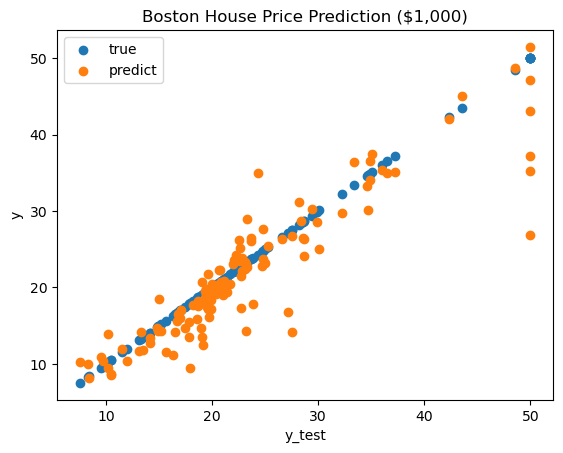

In [23]:
# 결과 시각화
plt.scatter(y_test, y_test, label='true')
plt.scatter(y_test, y_pred, label='predict')
plt.xlabel('y_test')
plt.ylabel('y')
plt.legend()
plt.title('Boston House Price Prediction ($1,000)')


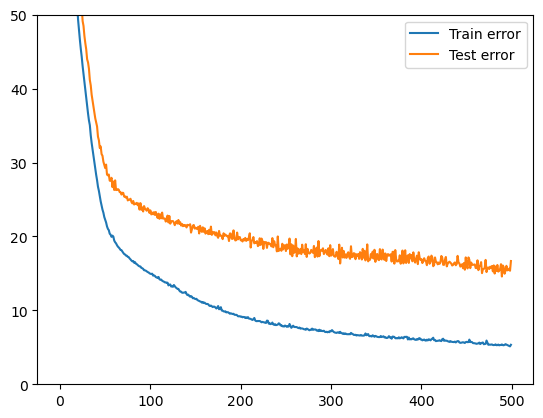

In [24]:
# 모델 훈련 과정 시각화
plt.plot(history.history['mse'], label='Train error')
plt.plot(history.history['val_mse'], label='Test error')
plt.ylim([0, 50])
plt.legend()

## sklearn LinearRegression 비교

In [25]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y)

sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

Coefficients: 
 [ -7.25623133   4.23755767   0.03779299   2.58812832  -7.60646151
  17.34362816  -0.38091183 -16.13445345   6.82881676  -5.7159147
  -8.40170659   3.71952873 -20.03575075]
Intercept: 
 27.891404145293606
Mean squared error: 18.03
R2 score: 0.80


Text(0.5, 1.0, 'Boston House Price Prediction ($1,000)')

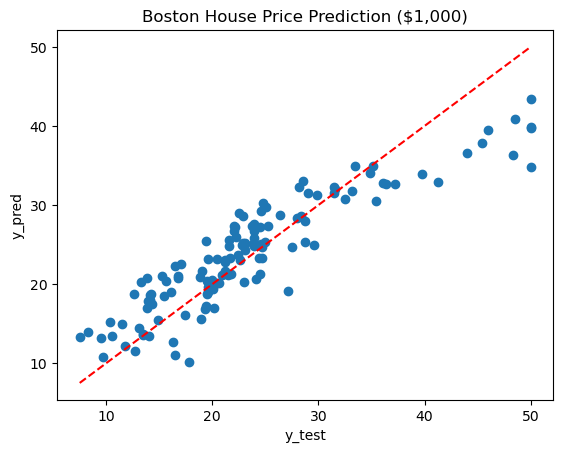

In [26]:
from sklearn.linear_model import LinearRegression

# 모델 설계
regr = LinearRegression()
# 모델 훈련
regr.fit(X_train, y_train)
# 예측
y_pred = regr.predict(X_test)

# The coefficients : 
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)

# MSE(mean squared error) 계산
print("Mean squared error: {:.2f}".format(mean_squared_error(y_test, y_pred)))

# R2 계산 
print("R2 score: {:.2f}".format(r2_score(y_test, y_pred)))

plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', c='r')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('Boston House Price Prediction ($1,000)')

## 실습

### UCI Machine Learning Repository 의 Auto MPG dataset 을 사용하여 자동차 연비 예측 Regression model 작성

- auto-mpg.data - data file  


- auto-mpg.names - data 설명 file

    1. mpg:           continuous  
    2. cylinders:     multi-valued discrete  
    3. displacement:  continuous (배기량)   
    4. horsepower:    continuous  
    5. weight:        continuous  
    6. acceleration:  continuous  
    7. model year:    multi-valued discrete  
    8. origin:        multi-valued discrete, 1 - USA, 2 - Europe, 3 - Japan  
    9. car name:      string (unique for each instance)  

Missing Attribute Values:  horsepower has 6 missing values  ==> "?" 로 들어 있으므로 read_csv 시 nan 으로 변환

In [27]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Data load 및 Preprocessing

In [28]:
# 링크로 불러와서 데이터를 다운로드 받기
data_path = tf.keras.utils.get_file("auto-mpg.data", 
        "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']
rawdata = pd.read_csv(data_path, names=column_names, na_values="?", comment="\t", sep=" ", skipinitialspace=True)

# null 데이터 삭제
rawdata.dropna(inplace=True)
data = rawdata.copy()
# 원핫 인코딩
data = pd.get_dummies(data, columns=['cylinders', 'origin'])
# 레이블 지정
label = data.pop('mpg')
# train / test split
X_train, X_test, y_train, y_test = train_test_split(data.values, label.values)
# 피처 스케일링
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

   8192/Unknown - 0s 0s/step

### Regression Model Build

In [30]:
# sequntial 모델
model = Sequential()
model.add(Dense(64, input_shape=(13,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))
model.summary()

# 모델 컴파일 
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae', 'mse'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                896       
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,009
Trainable params: 3,009
Non-trainable params: 0
_________________________________________________________________




### train / predict


In [31]:
# 훈련
history = model.fit(X_train, y_train, batch_size=32, 
                    epochs=500, validation_data=(X_test, y_test), verbose=1)
# 모델 평가 : 마지막에 찍힌 것을 한번 더 반복                   
model.evaluate(X_test, y_test, verbose=0)
# 모델 예측
y_pred = model.predict(X_test)

Epoch 1/500
10/10 [==============================] - 4s 141ms/step - loss: 617.0018 - mae: 23.5644 - mse: 617.0018 - val_loss: 543.2903 - val_mae: 22.0563 - val_mse: 543.2903
Epoch 2/500
10/10 [==============================] - 0s 26ms/step - loss: 584.9595 - mae: 22.9116 - mse: 584.9595 - val_loss: 513.0723 - val_mae: 21.3997 - val_mse: 513.0723
Epoch 3/500
10/10 [==============================] - 0s 16ms/step - loss: 550.8699 - mae: 22.1891 - mse: 550.8699 - val_loss: 477.4261 - val_mae: 20.6154 - val_mse: 477.4261
Epoch 4/500
10/10 [==============================] - 0s 21ms/step - loss: 507.2002 - mae: 21.2836 - mse: 507.2002 - val_loss: 434.7812 - val_mae: 19.6380 - val_mse: 434.7812
Epoch 5/500
10/10 [==============================] - 0s 28ms/step - loss: 456.4523 - mae: 20.1411 - mse: 456.4523 - val_loss: 381.8018 - val_mae: 18.3493 - val_mse: 381.8018
Epoch 6/500
10/10 [==============================] - 0s 15ms/step - loss: 393.0884 - mae: 18.6303 - mse: 393.0884 - val_loss: 318

### $r^2$ 계산



In [32]:
# R2 계산 : R2 score: 0.91 (1에 가까울 수록 음)
print("R2 score: {:.2f}".format(r2_score(y_test, y_pred)))

R2 score: 0.91


### 시각화

Text(0.5, 1.0, 'Boston House Price Prediction ($1,000)')

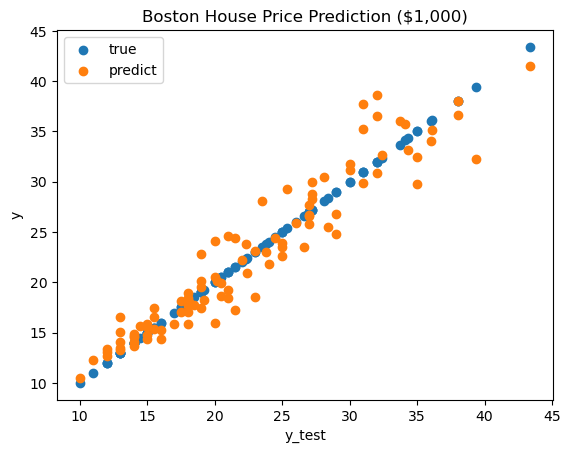

In [33]:
# 결과 시각화
plt.scatter(y_test, y_test, label='true')
plt.scatter(y_test, y_pred, label='predict')
plt.xlabel('y_test')
plt.ylabel('y')
plt.legend()
plt.title('Boston House Price Prediction ($1,000)')


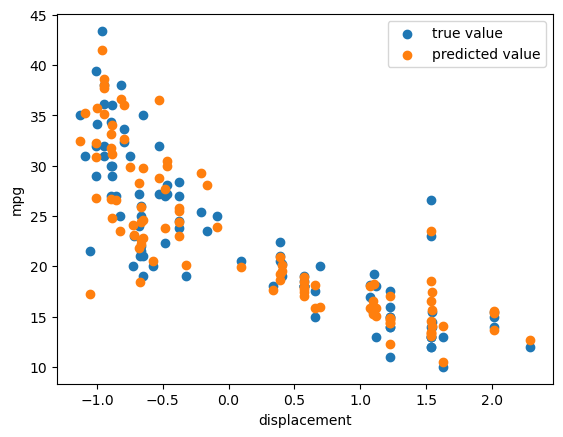

In [34]:
# displacement가 얼마일때, 연비가 얼마인지 확인
plt.scatter(X_test[:, 0], y_test, label='true value')
plt.scatter(X_test[:, 0], y_pred, label='predicted value')
plt.xlabel('displacement')
plt.ylabel('mpg')
plt.legend()

# 110. Malware Detection - binary classification

In [43]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [72]:
df = pd.read_csv('datasets/malware.csv', index_col=0)
df.head()

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
65416,VirusShare_3ede9b62781398a2e39a0f6af9356a54,3ede9b62781398a2e39a0f6af9356a54,332,224,258,10,0,117760,392192,0,...,5,3.425849,2.458492,4.035538,3146.400000,48,9640,72,15,0
23220,fxsocm.dll,9a0959a682d8eba06d0bd181c49ee2a8,332,224,8462,7,10,112640,29696,0,...,8,3.911994,2.669737,5.335373,1222.750000,164,4889,72,16,1
118017,VirusShare_abe7101746242c922a539ba461db4e38,abe7101746242c922a539ba461db4e38,332,224,258,10,0,119808,385024,0,...,6,3.776760,2.458492,5.317552,2740.166667,48,9640,72,15,0
69842,VirusShare_64a1247fc96d5bc2994ef89ca09adee8,64a1247fc96d5bc2994ef89ca09adee8,332,224,258,10,0,120320,385024,0,...,6,3.756068,2.458492,5.317552,2739.500000,48,9640,72,15,0
22165,asferror.dll,ebc23440aa9cc4f08241d35147c1d5b5,332,224,8462,7,10,0,7168,0,...,2,3.488703,3.471506,3.505901,3050.000000,888,5212,0,16,1


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 65416 to 72062
Data columns (total 57 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Name                         10000 non-null  object 
 1   md5                          10000 non-null  object 
 2   Machine                      10000 non-null  int64  
 3   SizeOfOptionalHeader         10000 non-null  int64  
 4   Characteristics              10000 non-null  int64  
 5   MajorLinkerVersion           10000 non-null  int64  
 6   MinorLinkerVersion           10000 non-null  int64  
 7   SizeOfCode                   10000 non-null  int64  
 8   SizeOfInitializedData        10000 non-null  int64  
 9   SizeOfUninitializedData      10000 non-null  int64  
 10  AddressOfEntryPoint          10000 non-null  int64  
 11  BaseOfCode                   10000 non-null  int64  
 12  BaseOfData                   10000 non-null  int64  
 13  ImageBase        

In [74]:
df = df.iloc[:, 2:] # object 열 제외

In [75]:
# X, y로 지정
y = df.pop('legitimate').values
X = df.values

X.shape, y.shape #((10000, 54), (10000,))

((10000, 54), (10000,))

In [76]:

# train, test 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 피처 스케일링
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

In [77]:
# 모델 구성
model = tf.keras.Sequential()
model.add(Dense(32, input_shape=(54,), activation="relu"))
model.add(Dense(16, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [78]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 32)                1760      
                                                                 
 dense_13 (Dense)            (None, 16)                528       
                                                                 
 dense_14 (Dense)            (None, 1)                 17        
                                                                 
Total params: 2,305
Trainable params: 2,305
Non-trainable params: 0
_________________________________________________________________


In [79]:
# 모델 컴파일 : 이진분류 이므로 손실은 binary_crossentropy
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])

In [80]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32,
                    validation_data=(X_test, y_test))

Epoch 1/20
250/250 [==============================] - 8s 14ms/step - loss: 0.1896 - accuracy: 0.9506 - val_loss: 0.0578 - val_accuracy: 0.9815
Epoch 2/20
250/250 [==============================] - 1s 5ms/step - loss: 0.0568 - accuracy: 0.9797 - val_loss: 0.0431 - val_accuracy: 0.9825
Epoch 3/20
250/250 [==============================] - 2s 7ms/step - loss: 0.0469 - accuracy: 0.9830 - val_loss: 0.0399 - val_accuracy: 0.9885
Epoch 4/20
250/250 [==============================] - 1s 6ms/step - loss: 0.0418 - accuracy: 0.9852 - val_loss: 0.0357 - val_accuracy: 0.9880
Epoch 5/20
250/250 [==============================] - 2s 8ms/step - loss: 0.0385 - accuracy: 0.9861 - val_loss: 0.0351 - val_accuracy: 0.9880
Epoch 6/20
250/250 [==============================] - 2s 8ms/step - loss: 0.0360 - accuracy: 0.9870 - val_loss: 0.0352 - val_accuracy: 0.9895
Epoch 7/20
250/250 [==============================] - 2s 9ms/step - loss: 0.0337 - accuracy: 0.9872 - val_loss: 0.0368 - val_accuracy: 0.9895
Epoch

In [81]:
score = model.evaluate(X_test, y_test, verbose=0)

print(model.metrics_names)
print("Test score : {:.2f}".format(score[0]))
print("Test accuracy : {:.2f}".format(score[1]))

['loss', 'accuracy']
Test score : 0.04
Test accuracy : 0.99


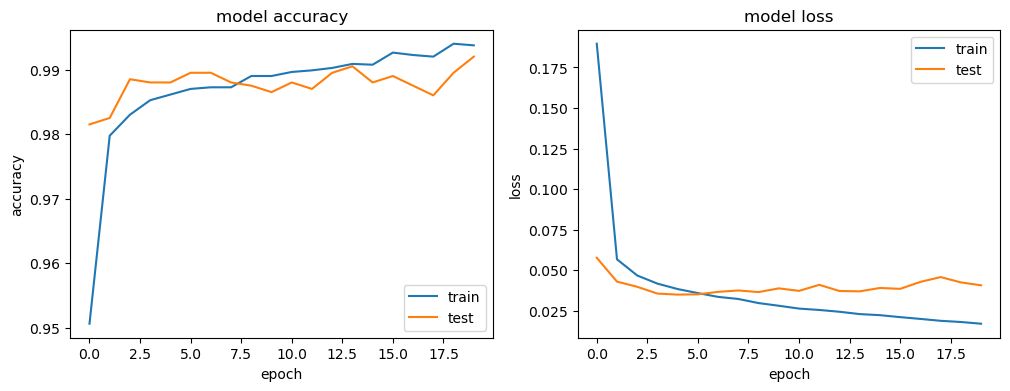

In [82]:
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'])

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'])

In [83]:
# y_pred가 1일 확률이므로 0.5와 비교하여 T/F로 바꾸는 작업이 필요
y_pred = model.predict(X_test) > 0.5
accuracy_score(y_test, y_pred) # 0.9905

63/63 [==============================] - 0s 4ms/step


0.992